In [29]:
import geopandas as gpd
import folium
from fuzzywuzzy import process
from cartopy import crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.pyplot as plt
from shapely.geometry import mapping


%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (30,20)

%matplotlib inline

In [2]:
stations = gpd.read_file("geo/gages/gagesII.geojson")

In [3]:
stations = stations[stations['STATE'] == 'WA']

In [4]:
stations.columns

Index(['STAID', 'STANAME', 'CLASS', 'AGGECOREGI', 'DRAIN_SQKM', 'HUC02',
       'LAT_GAGE', 'LNG_GAGE', 'STATE', 'HCDN_2009', 'ACTIVE09', 'FLYRS1900',
       'FLYRS1950', 'FLYRS1990', 'geometry'],
      dtype='object')

In [61]:
WATERSHED = "Nooksack"

In [62]:
theseStations = stations[stations["STANAME"].isin([n for n, s, v in process.extract(WATERSHED, stations['STANAME'])])]

---

In [63]:
huc = gpd.read_file("geo/nhd/Shape/WBDHU12.shp")
thesehuc = huc[huc["NAME"].isin([n for n, s, v in process.extract(WATERSHED, huc['NAME'])])]

In [64]:
flowline = gpd.read_file("geo/nhd/Shape/NHDFlowline.shp", bbox = list(thesehuc.total_bounds))

Text(0.5,1,'Nooksack')

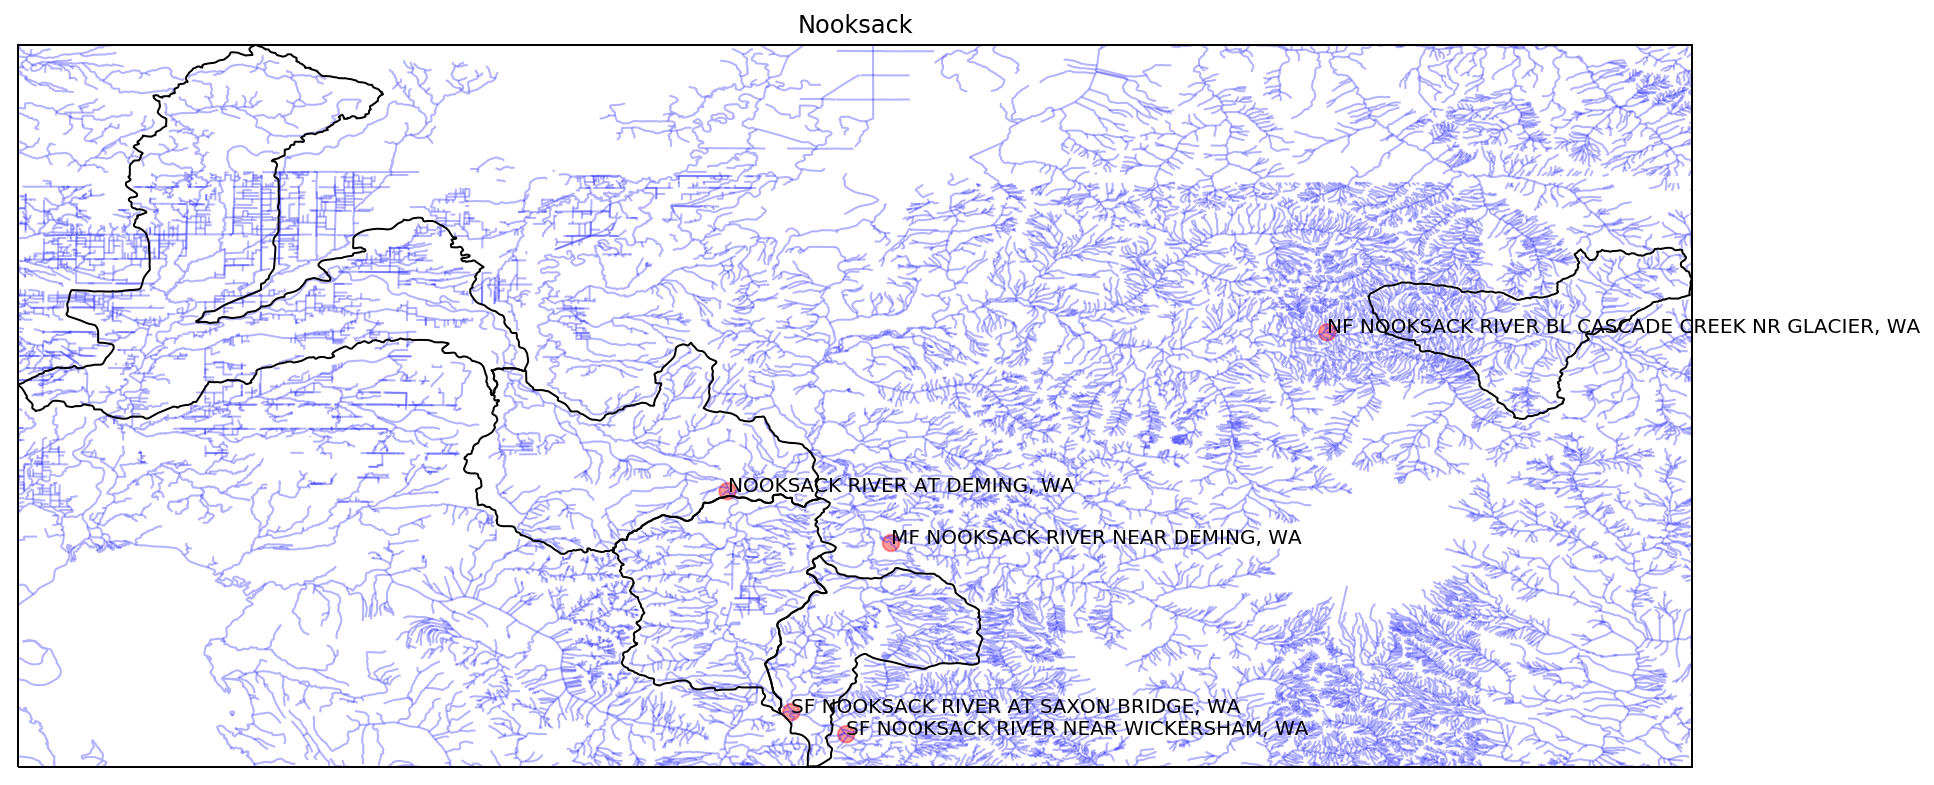

In [65]:
fig = plt.figure(figsize=(15,20))

ax = plt.axes(projection=ccrs.PlateCarree())
bounds = thesehuc.geometry.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.coastlines()
[ax.text(x.geometry.x, x. geometry.y, x.STANAME) for _, x in theseStations[['STANAME', 'geometry']].iterrows()]
ax.add_geometries(theseStations.geometry.buffer(0.005), color='red', alpha=0.4, crs=ccrs.PlateCarree())
ax.add_geometries(flowline.geometry, edgecolor='blue', facecolor='none', alpha=0.3, crs=ccrs.PlateCarree())
ax.add_geometries(thesehuc.geometry, facecolor='none', edgecolor='black', crs=ccrs.PlateCarree())
plt.title(WATERSHED)

In [67]:
center = (bounds[[1,3]].mean(),bounds[[0,2]].mean(), ) 
m = folium.Map(location=center)
folium.GeoJson(mapping(thesehuc.geometry), 
               style_function = lambda feature: {
                   'fillOpacity' : 0.2
               }).add_to(m)
[folium.GeoJson(data=mapping(x.geometry)).add_child(folium.Popup(x.STANAME)).add_to(m) for _, x in theseStations.iterrows()]
folium.GeoJson(mapping(flowline.geometry),
              style_function = lambda feature: {
                'weight': 0.5,
                'fillOpacity': 0.2,
              }).add_to(m)
m.save("out.html")


In [26]:
center

(-121.60452635710249, 47.520282175718137)

ValueError: Unhandled object [{'coordinates': (-121.64788091999996, 47.48593975000003), 'type': 'Point'}].

In [23]:
center

(array([-121.8305296 , -121.37852312]), 47.520282175718137)

In [30]:
mapping(theseStations.geometry)

{'bbox': (-121.79011085999998,
  47.415108599999975,
  -121.58732133999997,
  47.614825359999976),
 'features': [{'bbox': (-121.64788091999996,
    47.48593975000003,
    -121.64788091999996,
    47.48593975000003),
   'geometry': {'coordinates': (-121.64788091999996, 47.48593975000003),
    'type': 'Point'},
   'id': '8320',
   'properties': {},
   'type': 'Feature'},
  {'bbox': (-121.71344373,
    47.614825359999976,
    -121.71344373,
    47.614825359999976),
   'geometry': {'coordinates': (-121.71344373, 47.614825359999976),
    'type': 'Point'},
   'id': '8321',
   'properties': {},
   'type': 'Feature'},
  {'bbox': (-121.58732133999997,
    47.415108599999975,
    -121.58732133999997,
    47.415108599999975),
   'geometry': {'coordinates': (-121.58732133999997, 47.415108599999975),
    'type': 'Point'},
   'id': '8322',
   'properties': {},
   'type': 'Feature'},
  {'bbox': (-121.71788471,
    47.452603959999934,
    -121.71788471,
    47.452603959999934),
   'geometry': {'coordi